In [140]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [141]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4a/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4a/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [142]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,,0,,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,,0,,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,0.800000,0,,0,,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,,0,,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.200000,0,,0,,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,,0,,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,,0,,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.400000,0,,0,,1.000000,NO


<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

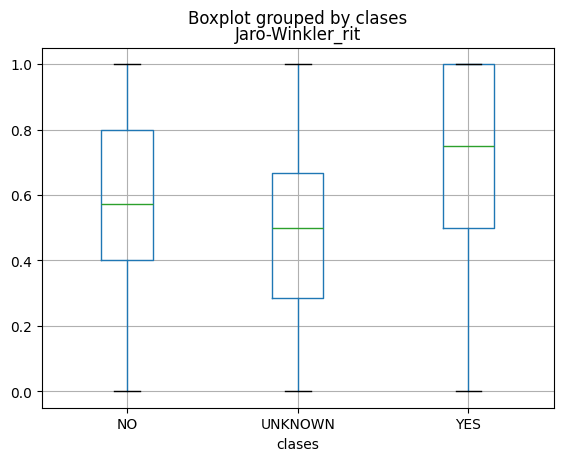

In [143]:
train.boxplot(by="clases",column="Jaro-Winkler_rit")

## Eliminar características

In [144]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,,0,,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,,0,,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,0.800000,0,,0,,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,,0,,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.200000,0,,0,,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,,0,,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,,0,,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.400000,0,,0,,1.000000,NO


In [145]:
train[(train["list_m"]!=0) & (train["clases"]=="YES")]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,,0,,0.666667,YES
16,1.389238,2.871445,2.151,1.871,3.934430,0.004554,0.285345,0,0.125000,1,7,2,16,0.714286,0,,0,,0.750000,YES
25,1.858186,1.464642,2.498,1.329,3.887436,0.004578,0.291467,0,0.030303,0,4,1,33,0.500000,0,,0,,0.666667,YES
27,-0.053825,1.481927,2.117,1.335,3.875875,0.003966,0.090035,0,0.076923,0,4,1,13,0.000000,0,,0,,0.333333,YES
31,2.058963,1.441614,1.799,1.714,3.924461,0.006038,0.352919,0,0.043478,0,5,1,23,0.600000,0,,0,,0.333333,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,2.594912,1.434798,2.070,1.902,4.077736,0.002682,0.741229,1,0.058824,0,6,1,17,0.833333,0,,0,,0.500000,YES
779,2.378852,1.463399,2.044,2.065,3.936022,0.003553,0.389897,0,0.040000,0,7,1,25,0.571429,0,,0,,0.500000,YES
791,2.019526,1.452324,2.180,2.017,3.949004,0.003593,0.378576,1,0.055556,0,6,1,18,0.833333,1,make,0,,0.250000,YES
794,2.117322,1.436944,1.805,1.675,3.965707,0.004654,0.309267,1,0.037037,0,13,1,27,0.769231,0,,0,,0.600000,YES


In [146]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'verbT',
       'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

In [147]:
train=train.drop(["verbT","verbH"],axis=1)

In [148]:
train = train[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]
train

,distancias,mutinf,max_info,diferencias,Jaro-Winkler_rit,overlap_ent,clases
0,0.000000,0.000000,0.000000,0.000000,0.333333,0.500000,YES
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,NO
2,1.455456,3.867700,0.465936,0.041667,0.800000,0.250000,UNKNOWN
3,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,YES
4,1.449291,3.937175,0.381601,0.076923,0.600000,0.666667,YES
...,...,...,...,...,...,...,...
795,1.420225,3.849615,0.329502,0.062500,0.200000,0.500000,UNKNOWN
796,0.000000,0.000000,0.000000,0.000000,1.000000,0.666667,YES
797,0.000000,0.000000,0.000000,0.000000,0.666667,0.500000,UNKNOWN
798,0.000000,0.000000,0.000000,0.000000,0.400000,1.000000,NO


In [149]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [150]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [151]:
train_m

,distancias,mutinf,max_info,diferencias,Jaro-Winkler_rit,overlap_ent
distancias,1.000000,0.591825,0.431178,0.862845,-0.443372,-0.389190
mutinf,0.591825,1.000000,0.806968,0.501505,-0.348537,-0.307829
max_info,0.431178,0.806968,1.000000,0.347633,-0.275463,-0.206246
diferencias,0.862845,0.501505,0.347633,1.000000,-0.407806,-0.342024
Jaro-Winkler_rit,-0.443372,-0.348537,-0.275463,-0.407806,1.000000,0.299081
overlap_ent,-0.389190,-0.307829,-0.206246,-0.342024,0.299081,1.000000


<Axes: >

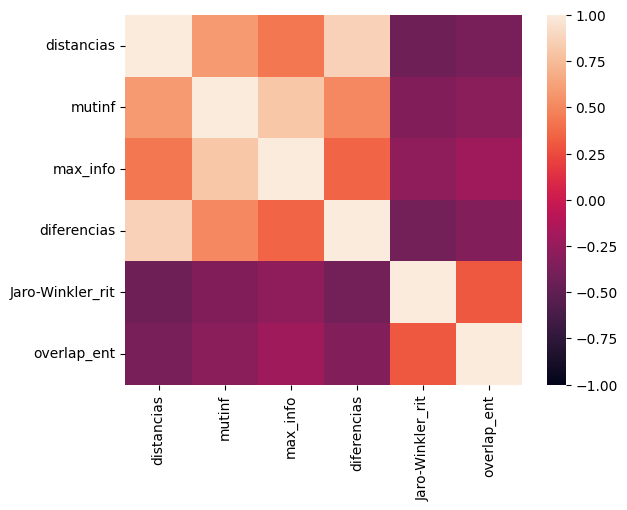

In [152]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [153]:
train_m

,distancias,mutinf,max_info,diferencias,Jaro-Winkler_rit,overlap_ent
distancias,1.000000,0.591825,0.431178,0.862845,-0.443372,-0.389190
mutinf,0.591825,1.000000,0.806968,0.501505,-0.348537,-0.307829
max_info,0.431178,0.806968,1.000000,0.347633,-0.275463,-0.206246
diferencias,0.862845,0.501505,0.347633,1.000000,-0.407806,-0.342024
Jaro-Winkler_rit,-0.443372,-0.348537,-0.275463,-0.407806,1.000000,0.299081
overlap_ent,-0.389190,-0.307829,-0.206246,-0.342024,0.299081,1.000000


In [154]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,distancias,mutinf,max_info,diferencias,Jaro-Winkler_rit,overlap_ent
distancias,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mutinf,0.591825,0.000000,0.000000,0.000000,0.000000,0.0
max_info,0.431178,0.806968,0.000000,0.000000,0.000000,0.0
diferencias,0.862845,0.501505,0.347633,0.000000,0.000000,0.0
Jaro-Winkler_rit,-0.443372,-0.348537,-0.275463,-0.407806,0.000000,0.0
overlap_ent,-0.389190,-0.307829,-0.206246,-0.342024,0.299081,0.0


In [155]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

max_info mutinf 0.8069675698026895
diferencias distancias 0.8628447895771267


In [156]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

In [157]:
# Checar variables colineales
#sns.relplot(data=train_m, x="mutinf", y="sumas")

In [158]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [159]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

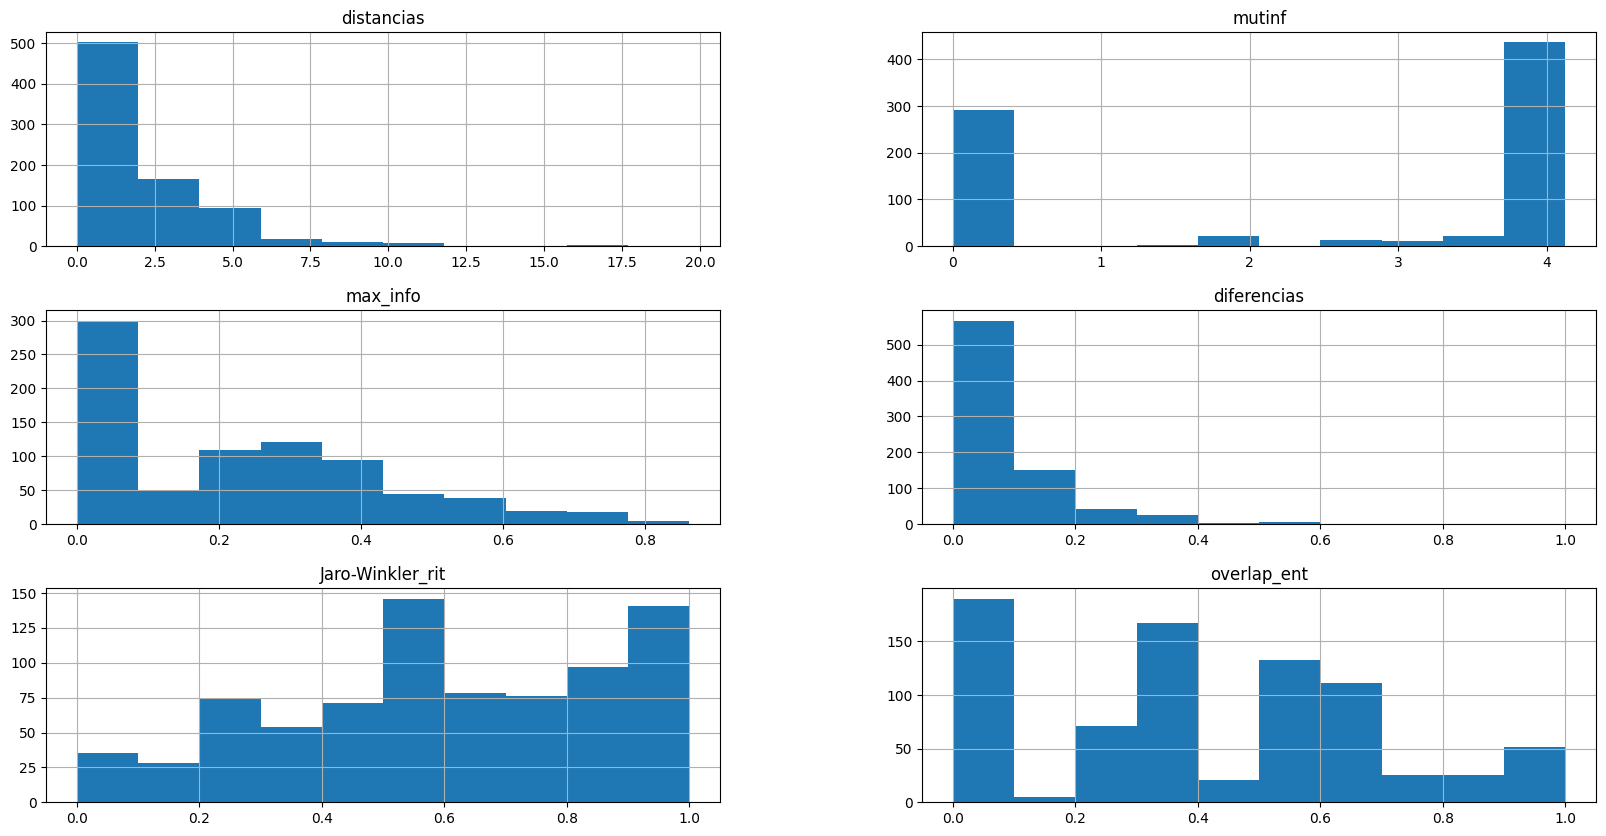

In [160]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [161]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4a/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4a/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [162]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,,0,,0.666667,YES
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,,0,,0.333333,YES
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,,0,,0.666667,YES
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,,0,,1.000000,YES
4,1.216129,1.457741,1.691,1.861,3.880129,0.004272,0.201056,0,0.050000,0,4,1,20,0.000000,0,,0,,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.080189,1.443651,2.198,2.042,3.839593,0.004145,0.490698,1,0.052632,1,5,1,19,0.400000,1,rush,0,,0.500000,YES
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.666667,0,,0,,0.333333,NO
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.000000,0,,0,,0.666667,UNKNOWN
798,0.366284,1.443915,1.767,0.881,3.781196,0.005778,0.129923,0,0.100000,0,4,1,10,0.500000,0,,0,,0.666667,UNKNOWN


In [163]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#test = test[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]



In [164]:
test=test.drop(["verbT","verbH"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,0,0.666667,YES
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,0,0.333333,YES
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,0,0.666667,YES
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,0,1.000000,YES
4,1.216129,1.457741,1.691,1.861,3.880129,0.004272,0.201056,0,0.050000,0,4,1,20,0.000000,0,0,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.080189,1.443651,2.198,2.042,3.839593,0.004145,0.490698,1,0.052632,1,5,1,19,0.400000,1,0,0.500000,YES
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.666667,0,0,0.333333,NO
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.000000,0,0,0.666667,UNKNOWN
798,0.366284,1.443915,1.767,0.881,3.781196,0.005778,0.129923,0,0.100000,0,4,1,10,0.500000,0,0,0.666667,UNKNOWN


In [165]:
test = test[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]


In [166]:
# test[(test["list_m"]==0) & (test["clases"]=="NO")].shape

In [167]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [168]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [169]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [170]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.        , 0.        , 0.33333333,
        0.5       ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.33333333],
       [0.0740187 , 0.93711365, 0.54057295, 0.04166667, 0.8       ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.66666667,
        0.5       ],
       [0.        , 0.        , 0.        , 0.        , 0.4       ,
        1.        ],
       [0.07505317, 0.94858194, 0.33744343, 0.04166667, 0.8       ,
        0.66666667]])

In [171]:
X_train.shape

(800, 6)

In [172]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [173]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [174]:
model.decision_function(X_train)

array([ 4.34005854e-01,  1.10730451e+00,  3.30895562e-01,  1.10730451e+00,
        3.35069203e-01,  1.13971533e+00,  4.85499175e-01, -6.58905727e-01,
        7.76606163e-01, -9.51257926e-01,  1.67811556e-01,  4.31625461e-01,
        1.43800286e+00, -6.69893360e-03,  2.69104970e-01,  6.05306008e-01,
        1.44001289e-01,  4.68717009e-01, -7.23518687e-01,  1.17320248e-01,
        1.16125694e+00, -1.85715004e-01,  2.29161165e-01,  1.06299173e+00,
        7.33522935e-01,  2.21529409e-01,  7.42877315e-01, -1.02002292e+00,
        2.37475416e-01, -2.77704448e-01,  1.09294343e+00,  4.66126231e-02,
        8.53329768e-01,  8.53329768e-01, -4.28189569e-01,  1.46819393e-02,
        1.43800286e+00,  8.39861950e-01, -5.04192408e-02,  1.27265368e+00,
        7.76606163e-01,  4.76958870e-02,  3.57282248e-01,  1.24398134e-01,
       -7.28936246e-01,  5.08893685e-01,  1.63825702e-01,  9.13233185e-01,
        4.15557412e-01,  6.87980595e-01, -1.03996310e+00,  7.92811573e-01,
        2.71616868e-01,  

In [175]:
labels=train.columns[:-1]
labels

Index(['distancias', 'mutinf', 'max_info', 'diferencias', 'Jaro-Winkler_rit',
       'overlap_ent'],
      dtype='object')

In [176]:
model.classes_

array([0, 1])

In [177]:
model.coef_[0]

array([-3.21942358, -0.59549135,  0.80737684, -1.97389128,  1.25797174,
        0.99209504])

In [178]:
coeficientes=model.coef_[0]

In [179]:
coeficientes

array([-3.21942358, -0.59549135,  0.80737684, -1.97389128,  1.25797174,
        0.99209504])

In [180]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  4 Jaro-Winkler_rit 0 distancias


In [181]:

n_columns=train.shape[1]-1

In [182]:
n_columns

6

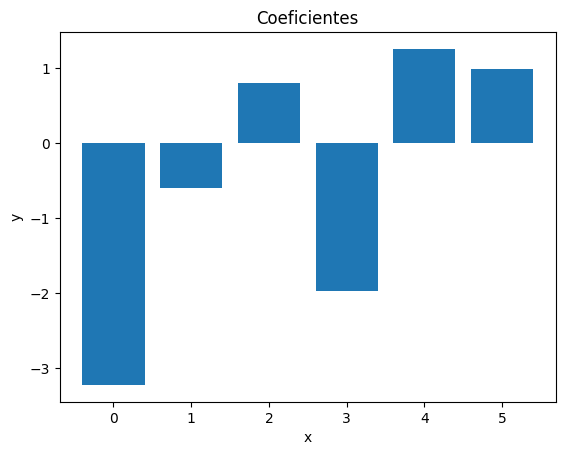

In [183]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [184]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.        , 0.        , 0.4       ,
        0.66666667],
       [0.        , 0.        , 0.        , 0.        , 0.8       ,
        0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.5       ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.66666667],
       [0.11002105, 0.9063162 , 0.14471859, 0.12      , 0.5       ,
        0.66666667],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        ]])

In [185]:
X_test.shape

(800, 6)

In [186]:
predictions = model.predict(X_test)

In [187]:
predictions

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [188]:
test["predicciones"]=predictions
test


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,distancias,mutinf,max_info,diferencias,Jaro-Winkler_rit,overlap_ent,clases,predicciones
0,0.000000,0.000000,0.000000,0.000000,0.400000,0.666667,YES,1
1,0.000000,0.000000,0.000000,0.000000,0.800000,0.333333,YES,1
2,0.000000,0.000000,0.000000,0.000000,0.500000,0.666667,YES,1
3,0.000000,0.000000,0.000000,0.000000,0.666667,1.000000,YES,1
4,1.457741,3.880129,0.201056,0.050000,0.000000,1.000000,NO,0
...,...,...,...,...,...,...,...,...
795,1.443651,3.839593,0.490698,0.052632,0.400000,0.500000,YES,0
796,0.000000,0.000000,0.000000,0.000000,0.666667,0.333333,NO,1
797,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,UNKNOWN,1
798,1.443915,3.781196,0.129923,0.100000,0.500000,0.666667,UNKNOWN,0


In [189]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,distancias,mutinf,max_info,diferencias,Jaro-Winkler_rit,overlap_ent,clases,predicciones
30,1.470049,3.820110,0.216965,0.047619,0.400000,0.750000,YES,0
32,1.433030,3.823568,0.096198,0.066667,0.500000,0.666667,YES,0
43,2.885449,3.971615,0.265411,0.125000,0.600000,1.000000,YES,0
46,1.448163,3.821937,0.174468,0.055556,0.333333,0.666667,YES,0
60,1.463791,3.993181,0.380079,0.038462,0.400000,0.333333,YES,0
...,...,...,...,...,...,...,...,...
743,8.725696,3.932902,0.223007,0.375000,0.235294,0.375000,YES,0
765,1.470267,4.038391,0.185117,0.052632,0.666667,0.500000,YES,0
776,1.448614,3.926249,0.761328,0.062500,0.000000,0.666667,YES,0
789,1.420555,3.844811,0.139605,0.052632,0.500000,0.333333,YES,0


In [190]:
print(confusion_matrix(y_test, predictions))

[[231 159]
 [114 296]]


In [191]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.66
precision:  0.65
recall 0.72
f1_score:  0.68
matthews_score:  0.32


In [192]:
X_train.shape

(800, 6)

In [193]:
X_test.shape

(800, 6)

In [194]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [195]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [196]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.690000 (0.105595)
Logistic Regression Precision:: 0.700000 (0.110782)
Logistic Regression Recall:: 0.760000 (0.092355)
Logistic Regression F1-score:: 0.720000 (0.070149)


In [57]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.700000 (0.115355)
Logistic Regression Recall:: 0.700000 (0.109060)
Logistic Regression F1-score:: 0.690000 (0.126711)


In [58]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.700000 (0.115323)
Logistic Regression Recall:: 0.700000 (0.113571)
Logistic Regression F1-score:: 0.690000 (0.129139)


In [60]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.700000 (0.109060)
Logistic Regression Recall:: 0.700000 (0.109060)
Logistic Regression F1-score:: 0.700000 (0.109060)


In [61]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.380000 (0.242381)


In [58]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [56]:
#linear_model

In [81]:
#model = LogisticRegression()
#model.fit(X_train,y_train)

In [59]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       390
           1       0.65      0.73      0.69       410

    accuracy                           0.66       800
   macro avg       0.66      0.66      0.66       800
weighted avg       0.66      0.66      0.66       800



In [61]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [62]:
test.columns[:-1]

Index(['list_incomp', 'Jaro-Winkler_rit', 'overlap_ent', 'mutinf', 'list_m',
       'clases'],
      dtype='object')

In [63]:
explainer.expected_value

-0.07721617116650836

In [64]:
X_test

array([[0.        , 0.4       , 0.66666667, 0.        , 0.        ],
       [0.        , 0.8       , 0.33333333, 0.        , 0.        ],
       [0.        , 0.5       , 0.66666667, 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.66666667, 0.        , 0.        ],
       [0.        , 0.5       , 0.66666667, 0.9063162 , 0.11111111],
       [0.        , 1.        , 1.        , 0.        , 0.        ]])

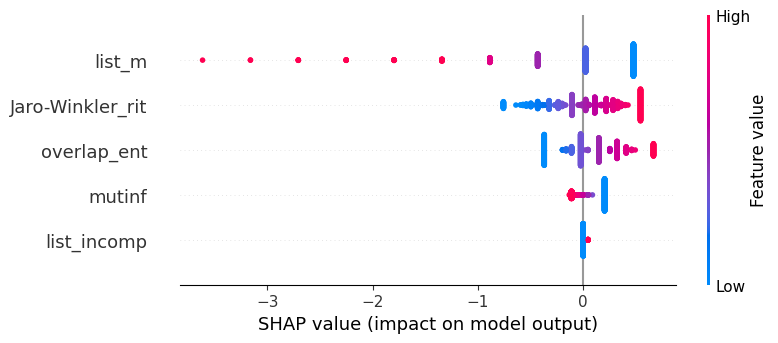

In [66]:
shap.plots.beeswarm(shap_values)

In [67]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.         0.8        0.33333333 0.89697426 0.11111111] 0 1


IndexError: index 5 is out of bounds for axis 0 with size 5

In [65]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.57684496 0.         0.         0.
 0.         0.         0.         0.         0.29411765 0.
 0.42857143 1.         0.         0.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

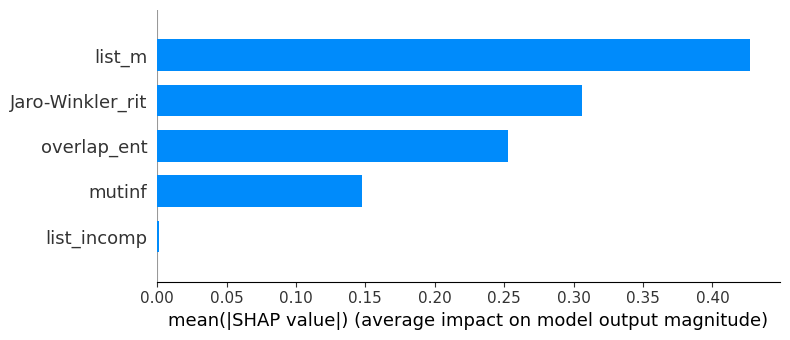

In [68]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

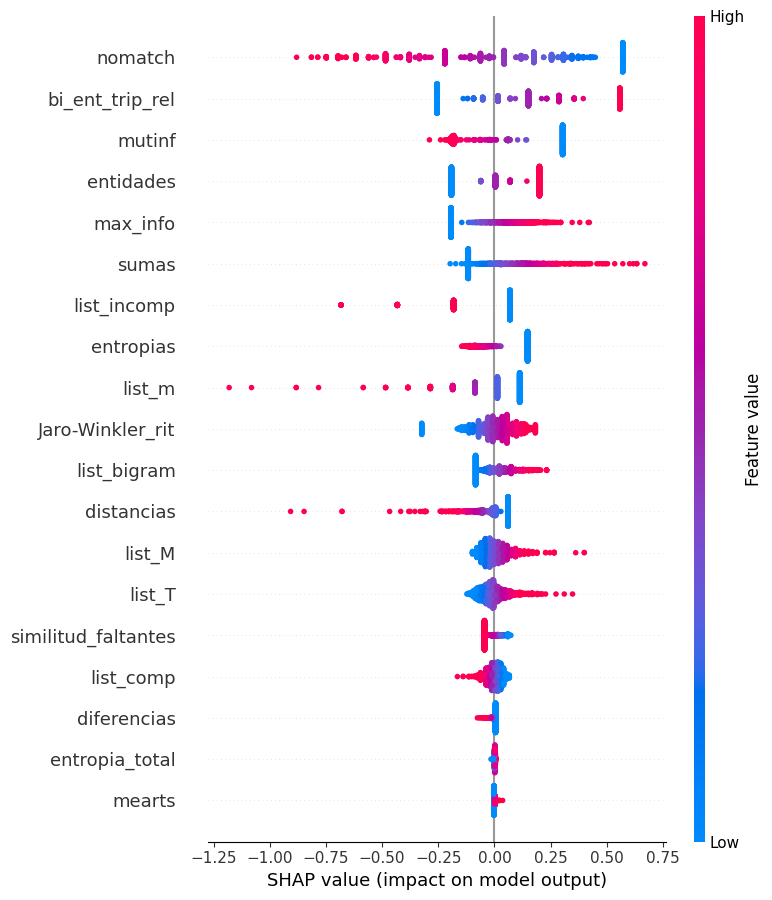

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

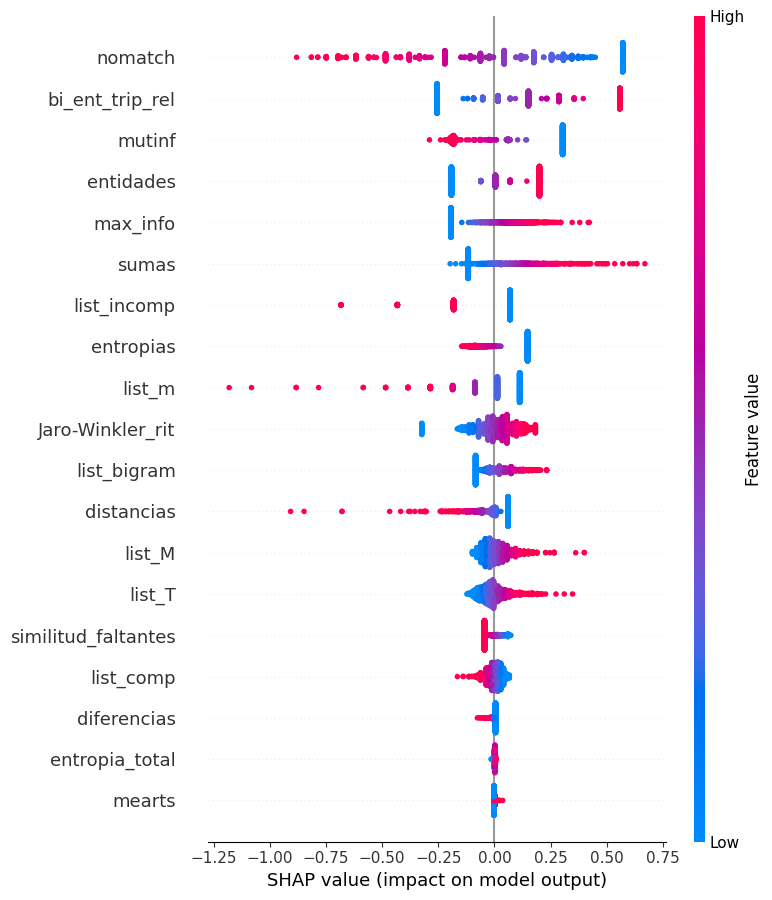

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

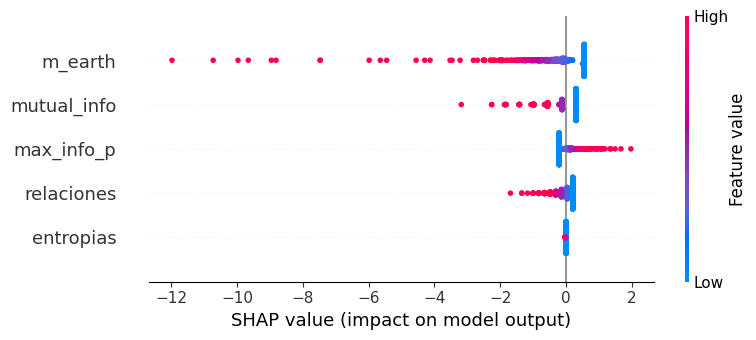

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [197]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [204]:
clf = DecisionTreeClassifier(splitter="random",criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [205]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.65
precision:  0.64
recall 0.72
f1_score:  0.68
matthews_score:  0.3


In [206]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [207]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.620000 (0.038039)
DecisionTree: 0.630000 (0.036153)
DecisionTree: 0.680000 (0.060250)
DecisionTree: 0.650000 (0.030989)


In [202]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[256, 134],
       [183, 227]])

Profundidad del árbol: 22
Número de nodos terminales: 278


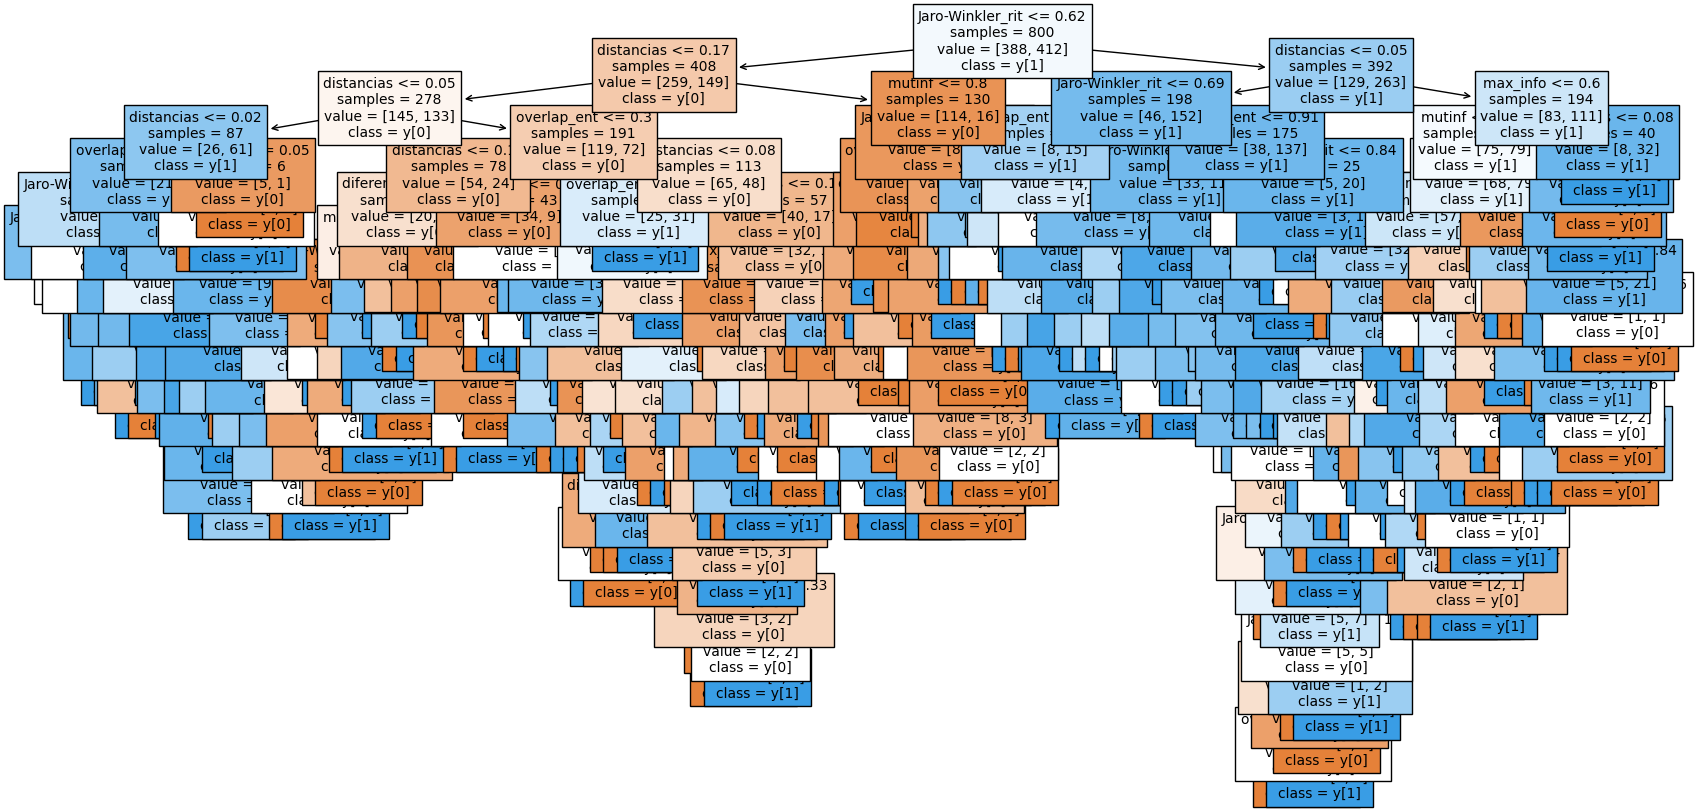

In [203]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )